# Grafico de bigotes para calibración de velocidades
Se calibran las velocidades segun un Boxplot para descartar los valores que pueden afectar el calculo promedio de velocidades

## Necesarios
* Puntos con las velocidades
* librerias instadas en especial Geopandas

In [1]:
#Se importan las librerias necesarias
import seaborn as sns
import math as mt
import pandas as pd
import numpy as np
import geopandas as gp
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

In [2]:
#Se cargan los puntos con las velocidades
velcarro = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/shapes/Carro.shp")
velmoto = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/shapes/Moto.shp")
#velbici = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/PuntosVelocidades/p_vel_orig/Bici.shp")
velbici = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/shapes/Bici2.shp")
velTPC = gp.read_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/shapes/TPC.shp")

In [3]:
#Se revisan los nombres de las columnas
velcarro.columns

Index(['file', 'ID', 'altura', 'velocity_m', 'velocity_k', 'timestamp',
       'latitud', 'longitud', 'fecha', 't0', 'tiempo', 'angulo_vel',
       'geometry'],
      dtype='object')

# Datos estadisticos para calibración de velocidades
Calculo de los datos por modo en el que se muestran los graficos de bigotes
y datos estadisticos que determinen la calidad de los puntos de velocidad por modo

## Carro

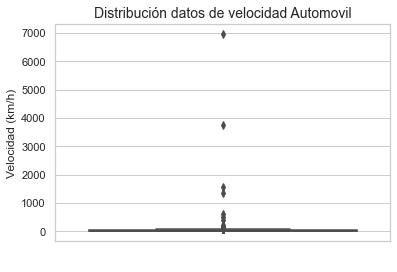

In [9]:
#Se realiza el boxplot de las velocidades en carro
boxplot = sns.boxplot(y=velcarro["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad Automovil", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Automovil1.png", dpi = 300)

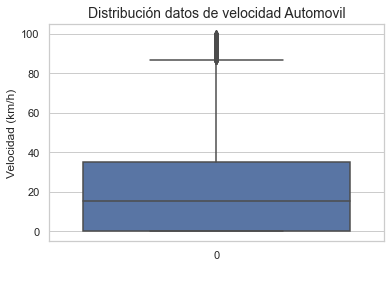

In [15]:
#Se eliminan los datos con velocidades mayores a 100 km/h
velcarro = velcarro[(velcarro.velocity_k <= 100)]
boxplot = sns.boxplot(data=velcarro["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad Automovil", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Automovil2.png", dpi = 300)

In [23]:
#La media aritmética se define como la suma de N elementos dividida entre N.
media = velcarro["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana = velcarro["velocity_k"].median()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstd = velcarro["velocity_k"].std(ddof=0)
var = velcarro["velocity_k"].var(ddof=0)

print("Media: ", media)
print("Mediana: ", mediana)
print("Desviasión estandar: ", desvstd)
print("Variancia: ", var)

Media:  20.36683796958252
Mediana:  15.433829848448344
Desviasión estandar:  21.122304802050593
Variancia:  446.15176015072956


In [24]:
#Máximo
maximo = velcarro["velocity_k"].max()
#Mínimo
minimo = velcarro["velocity_k"].min()
#percentil 75
Q75 = velcarro["velocity_k"].quantile(0.75)
#Percentil 25
Q25 = velcarro["velocity_k"].quantile(0.25)
#El rango es la diferencia entre el máximo y el mínimo
rango = velcarro["velocity_k"].max() - velcarro["velocity_k"].min()
#el rango intercuartílico o IQR es la diferencia entre el tercer y el primer cuartil.
iqr = velcarro["velocity_k"].quantile(0.75) - velcarro["velocity_k"].quantile(0.25)

print("Máximo: ", maximo)
print("Mínimo: ", minimo)
print("Percentil 75: ", Q75)
print("Percentil 25: ", Q25)
print("Rango: ", rango)
print("IQR: ", iqr)

Máximo:  99.98803724065444
Mínimo:  0.0
Percentil 75:  34.98069816951697
Percentil 25:  0.4550278777758565
Rango:  99.98803724065444
IQR:  34.525670291741115


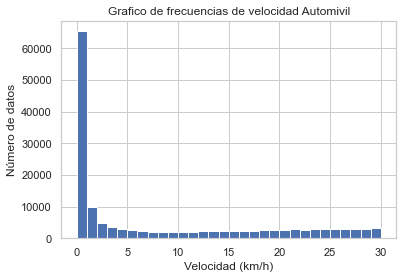

In [26]:
#Se revisan las velocidades de la ciudad menor a 30km/h para revisar cual es la velocidad menor mas representativa y cual puede ser basura
Valor_min=30
car0 = velcarro[(velcarro.velocity_k <= Valor_min)]
#bins = np.arange(0, 2+0.5, 0.5)
#Se define el rango de división de los datos
rango = 1
#Se construye el grupo de datos
n_group = int(Valor_min/rango)
#Definición del histograma
hist, bin_edges = np.histogram(car0["velocity_k"], n_group)
plt.hist(car0["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad Automivil")
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Automovil3.png", dpi = 300)

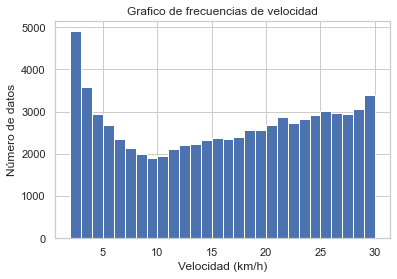

In [36]:
#Una vez visto los datosse hace un rango mas cerrado sacando los posibles datos basura
#Se define el rango minimo y mayor para ver el comportamiento de los datos
Valor_min=2
Valor_med=30
#Se sacan los valores con estas caracteristicas
car1 = velcarro[(velcarro.velocity_k >= Valor_min) & (velcarro.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(car1["velocity_k"], n_group)
plt.hist(car1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad")
#plt.show()
plt.savefig("C:/Users/user/Desktop/Tesis/Figuras/02Ceros2.png", dpi = 300)

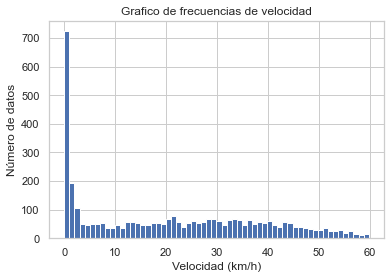

In [37]:
#Para comparar la velocidad de la ciudad se determina una zona caracteristica como el centro en la que se puedan tener velocidades bajas
#Se determinan las coordenadas CX1 y CY1 en la esquina superior izquierda de la zona rectangular
#Se determinan las coordenadas CX2 y CY2 en la esquina inferior derecha de la zona rectangular
CX1 = 870237.698
CY1 = 983702.597
CX2 = 870777.45
CY2 = 983131.096
#punto=velcarro.loc[1,'geometry']
#p=punto.x 
#Se extraen los datos que cumplan con esta condición entrando en la zona de analisis
velocidadcentro = velcarro[((velcarro.geometry.x >= CX1) & (velcarro.geometry.y <= CY1)) & ((velcarro.geometry.x <= CX2) & (velcarro.geometry.y >= CY2))]
#Se define un valor maximo de velocidad para ver el comportamiento en el histograma
Valor_min=60
carc = velocidadcentro[(velocidadcentro.velocity_k <= Valor_min)]
#bins = np.arange(0, 2+0.5, 0.5)
#Al igual que un rango de los datos para verlos
rango = 1
n_group = int(Valor_min/rango)
hist, bin_edges = np.histogram(carc["velocity_k"], n_group)
plt.hist(carc["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad")
#plt.show()
plt.savefig("C:/Users/user/Desktop/Tesis/Figuras/03CerosCentro.png", dpi = 300)

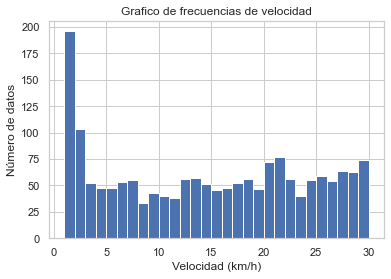

In [38]:
#Despues de ver el comportamiento se define un valor menor haciendo un zoom a los datos del analisis
Valor_min=1
Valor_med=30
carc1 = velocidadcentro[(velocidadcentro.velocity_k >= Valor_min) & (velocidadcentro.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(carc1["velocity_k"], n_group)
plt.hist(carc1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad")
#plt.show()
plt.savefig("C:/Users/user/Desktop/Tesis/Figuras/04CerosCentro1.png", dpi = 300)

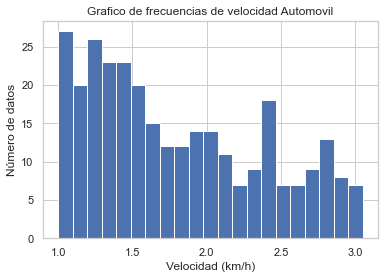

In [40]:
#Por ultimo se hace un analisis en los datos donde la tendencia es similar al de las velocidades altas
Valor_min=1
Valor_med=3.1
carc1 = velocidadcentro[(velocidadcentro.velocity_k >= Valor_min) & (velocidadcentro.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 0.1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(carc1["velocity_k"], n_group)
plt.hist(carc1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad Automovil")
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Automovil4.png", dpi = 300)

In [41]:
#Se define rangos de velocidad de 1.6km/h como minima segun el anterior analisis
#y rango máximo de 82km/h para quedar dentro de los rangos del boxplot
ceroscar = velcarro[(velcarro.velocity_k > 1.6) & (velcarro.velocity_k <= 100)]
print(len(ceroscar))
print(len(velcarro))
print(len(velcarro)-len(ceroscar))

147078
219387
72309


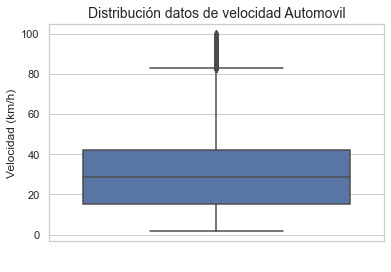

In [42]:
#Se recalcula el boxplot para determinar las velocidades fuera de rango
boxplot = sns.boxplot(y=ceroscar["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad Automovil", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Automovil5.png", dpi = 300)

In [43]:
#Se calculan los datos estadisticos de estas velocidades
#La media aritmética se define como la suma de N elementos dividida entre N.
medianew = ceroscar["velocity_k"].mean()
mediaref = velcarro["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediananew = ceroscar["velocity_k"].median()
medianaref = velcarro["velocity_k"].median()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstdnew = ceroscar["velocity_k"].std(ddof=0)
desvstdref = velcarro["velocity_k"].std(ddof=0)
varnew = ceroscar["velocity_k"].var(ddof=0)
varref = velcarro["velocity_k"].var(ddof=0)


print("Media ref: ", mediaref)
print("Media new: ", medianew)
print(" ")
print("Mediana ref: ", medianaref)
print("Mediana new: ", mediananew)
print(" ")
print("Desviasión estandar ref: ", desvstdref)
print("Desviasión estandar new: ", desvstdnew)
print(" ")
print("Variancia ref: ", varref)
print("Variancia new: ", varnew)

Media ref:  20.36683796958252
Media new:  30.24225383242277
 
Mediana ref:  15.433829848448344
Mediana new:  28.643851508261754
 
Desviasión estandar ref:  21.122304802050593
Desviasión estandar new:  19.223019731728627
 
Variancia ref:  446.15176015072956
Variancia new:  369.5244876064281


In [44]:
#Máximo
maximoref = velcarro["velocity_k"].max()
maximonew = ceroscar["velocity_k"].max()
#Mínimo
minimoref = velcarro["velocity_k"].min()
minimonew = ceroscar["velocity_k"].min()
#percentil 75
Q75ref = velcarro["velocity_k"].quantile(0.75)
Q75new = ceroscar["velocity_k"].quantile(0.75)
#Percentil 25
Q25ref = velcarro["velocity_k"].quantile(0.25)
Q25new = ceroscar["velocity_k"].quantile(0.25)
#El rango es la diferencia entre el máximo y el mínimo
rangoref = velcarro["velocity_k"].max() - velcarro["velocity_k"].min()
rangonew = ceroscar["velocity_k"].max() - ceroscar["velocity_k"].min()
#el rango intercuartílico o IQR es la diferencia entre el tercer y el primer cuartil.
iqrref = velcarro["velocity_k"].quantile(0.75) - velcarro["velocity_k"].quantile(0.25)
iqrnew = ceroscar["velocity_k"].quantile(0.75) - ceroscar["velocity_k"].quantile(0.25)

print("Máximo ref: ", maximoref)
print("Máximo new: ", maximonew)
print(" ")
print("Mínimo ref: ", minimoref)
print("Mínimo new: ", minimonew)
print(" ")
print("Percentil 75 ref: ", Q75ref)
print("Percentil 75 new: ", Q75new)
print(" ")
print("Percentil 25 ref: ", Q25ref)
print("Percentil 25 new: ", Q25new)
print(" ")
print("Rango ref: ", rangoref)
print("Rango new: ", rangonew)
print(" ")
print("IQR ref: ", iqrref)
print("IQR new: ", iqrnew)

Máximo ref:  99.98803724065444
Máximo new:  99.98803724065444
 
Mínimo ref:  0.0
Mínimo new:  1.60034670840202
 
Percentil 75 ref:  34.98069816951697
Percentil 75 new:  42.21860214224524
 
Percentil 25 ref:  0.4550278777758565
Percentil 25 new:  15.144192178458376
 
Rango ref:  99.98803724065444
Rango new:  98.38769053225242
 
IQR ref:  34.525670291741115
IQR new:  27.074409963786863


In [45]:
#Se guarda el Shape
ceroscar.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/shapes_fin/Carro.shp")

## Moto

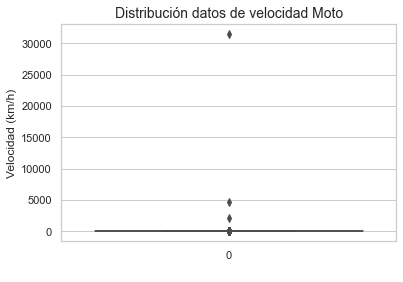

In [17]:
#Se realiza el boxplot de las velocidades en moto
boxplot = sns.boxplot(data=velmoto["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad Moto", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Moto1.png", dpi = 300)

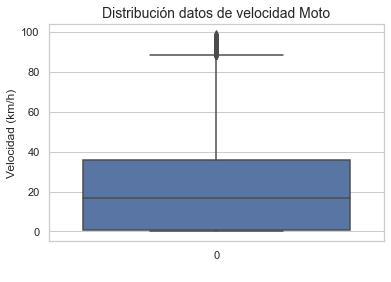

In [20]:
#Se eliminan los datos con velocidades mayores a 100 km/h
velmoto = velmoto[(velmoto.velocity_k <= 100)]
boxplot = sns.boxplot(data=velmoto["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad Moto", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Moto2.png", dpi = 300)

In [27]:
#La media aritmética se define como la suma de N elementos dividida entre N.
media = velmoto["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana = velmoto["velocity_k"].median()
#La moda es el valor más repetido (solo aplicable a variables discretas).
moda = velmoto["velocity_k"].mode()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstd = velmoto["velocity_k"].std(ddof=0)
var = velmoto["velocity_k"].var(ddof=0)

print("Media: ", media)
print("Mediana: ", mediana)
print("Desviasión estandar: ", desvstd)
print("Variancia: ", var)
print("Moda: ", moda)


Media:  20.880010701384112
Mediana:  16.929832876084085
Desviasión estandar:  21.144654704154878
Variancia:  447.09642255793904
Moda:  0    0.0
dtype: float64


In [28]:
#Máximo
maximo = velmoto["velocity_k"].max()
#Mínimo
minimo = velmoto["velocity_k"].min()
#percentil 75
Q75 = velmoto["velocity_k"].quantile(0.75)
#Percentil 25
Q25 = velmoto["velocity_k"].quantile(0.25)
#El rango es la diferencia entre el máximo y el mínimo
rango = velmoto["velocity_k"].max() - velmoto["velocity_k"].min()
#el rango intercuartílico o IQR es la diferencia entre el tercer y el primer cuartil.
iqr = velmoto["velocity_k"].quantile(0.75) - velmoto["velocity_k"].quantile(0.25)

print("Máximo: ", maximo)
print("Mínimo: ", minimo)
print("Percentil 75: ", Q75)
print("Percentil 25: ", Q25)
print("Rango: ", rango)
print("IQR: ", iqr)

Máximo:  99.05485070973361
Mínimo:  0.0
Percentil 75:  35.650574943264026
Percentil 25:  0.4942240198054865
Rango:  99.05485070973361
IQR:  35.15635092345854


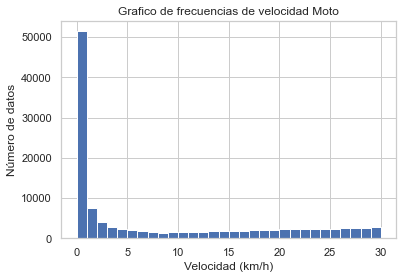

In [29]:
#Se revisan las velocidades de la ciudad menor a 30km/h para revisar cual es la velocidad menor mas representativa y cual puede ser basura
Valor_min=30
mot0 = velmoto[(velmoto.velocity_k <= Valor_min)]
#bins = np.arange(0, 2+0.5, 0.5)
#Se define el rango de división de los datos
rango = 1
#Se construye el grupo de datos
n_group = int(Valor_min/rango)
#Definición del histograma
hist, bin_edges = np.histogram(mot0["velocity_k"], n_group)
plt.hist(mot0["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad Moto")
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Moto3.png", dpi = 300)

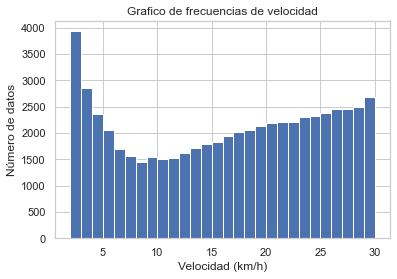

In [46]:
#Una vez visto los datosse hace un rango mas cerrado sacando los posibles datos basura
#Se define el rango minimo y mayor para ver el comportamiento de los datos
Valor_min=2
Valor_med=30
#Se sacan los valores con estas caracteristicas
mot1 = velmoto[(velmoto.velocity_k >= Valor_min) & (velmoto.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(mot1["velocity_k"], n_group)
plt.hist(mot1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad")
plt.show()

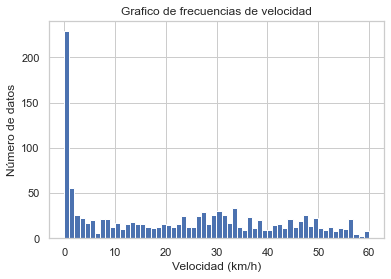

In [47]:
#Para comparar la velocidad de la ciudad se determina una zona caracteristica como el centro en la que se puedan tener velocidades bajas
#Se determinan las coordenadas CX1 y CY1 en la esquina superior izquierda de la zona rectangular
#Se determinan las coordenadas CX2 y CY2 en la esquina inferior derecha de la zona rectangular
CX1 = 870237.698
CY1 = 983702.597
CX2 = 870777.45
CY2 = 983131.096
#punto=velcarro.loc[1,'geometry']
#p=punto.x 
#Se extraen los datos que cumplan con esta condición entrando en la zona de analisis
velocidadcentro = velmoto[((velmoto.geometry.x >= CX1) & (velmoto.geometry.y <= CY1)) & ((velmoto.geometry.x <= CX2) & (velmoto.geometry.y >= CY2))]
#Se define un valor maximo de velocidad para ver el comportamiento en el histograma
Valor_min=60
motc = velocidadcentro[(velocidadcentro.velocity_k <= Valor_min)]
#bins = np.arange(0, 2+0.5, 0.5)
#Al igual que un rango de los datos para verlos
rango = 1
n_group = int(Valor_min/rango)
hist, bin_edges = np.histogram(motc["velocity_k"], n_group)
plt.hist(motc["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad")
plt.show()

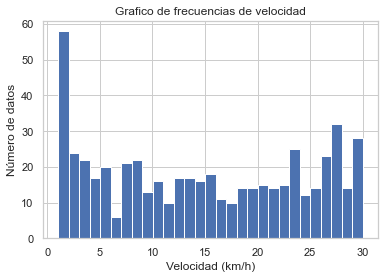

In [48]:
#Despues de ver el comportamiento se define un valor menor haciendo un zoom a los datos del analisis
Valor_min=1
Valor_med=30
motc1 = velocidadcentro[(velocidadcentro.velocity_k >= Valor_min) & (velocidadcentro.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(motc1["velocity_k"], n_group)
plt.hist(motc1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad")
plt.show()

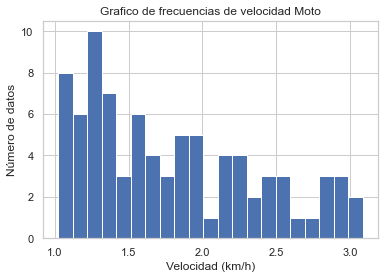

In [49]:
#Por ultimo se hace un analisis en los datos donde la tendencia es similar al de las velocidades altas
Valor_min=1
Valor_med=3.1
motc1 = velocidadcentro[(velocidadcentro.velocity_k >= Valor_min) & (velocidadcentro.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 0.1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(motc1["velocity_k"], n_group)
plt.hist(motc1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad Moto")
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Moto4.png", dpi = 300)

In [50]:
#Se define rangos de velocidad de 2km/h como minima segun el anterior analisis
#y rango máximo de 79km/h para quedar dentro de los rangos del boxplot
cerosmoto = velmoto[(velmoto.velocity_k >= 1.6) & (velmoto.velocity_k <= 100)]
print(len(cerosmoto))
print(len(velmoto))
print(len(velmoto)-len(cerosmoto))

119742
176454
56712


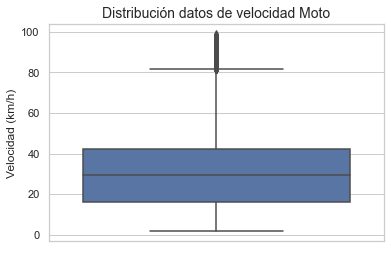

In [51]:
#Se recalcula el boxplot para determinar las velocidades fuera de rango
boxplot = sns.boxplot(y=cerosmoto["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad Moto", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Moto5.png", dpi = 300)

In [52]:
#La media aritmética se define como la suma de N elementos dividida entre N.
medianew = cerosmoto["velocity_k"].mean()
mediaref = velmoto["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediananew = cerosmoto["velocity_k"].median()
medianaref = velmoto["velocity_k"].median()
#La moda es el valor más repetido (solo aplicable a variables discretas).
modanew = cerosmoto["velocity_k"].mode()
modaref = velmoto["velocity_k"].mode()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstdnew = cerosmoto["velocity_k"].std(ddof=0)
desvstdref = velmoto["velocity_k"].std(ddof=0)
varnew = cerosmoto["velocity_k"].var(ddof=0)
varref = velmoto["velocity_k"].var(ddof=0)


print("Media ref: ", mediaref)
print("Media new: ", medianew)
print(" ")
print("Mediana ref: ", medianaref)
print("Mediana new: ", mediananew)
print(" ")
print("Desviasión estandar ref: ", desvstdref)
print("Desviasión estandar new: ", desvstdnew)
print(" ")
print("Variancia ref: ", varref)
print("Variancia new: ", varnew)
print(" ")
print("Moda ref: ", modaref)
print("Moda new: ", modanew)

Media ref:  20.880010701384112
Media new:  30.638890029631614
 
Mediana ref:  16.929832876084085
Mediana new:  29.367692233133063
 
Desviasión estandar ref:  21.144654704154878
Desviasión estandar new:  19.03822459368365
 
Variancia ref:  447.09642255793904
Variancia new:  362.45399567954104
 
Moda ref:  0    0.0
dtype: float64
Moda new:  0    47.0
dtype: float64


In [53]:
#Máximo
maximoref = velmoto["velocity_k"].max()
maximonew = cerosmoto["velocity_k"].max()
#Mínimo
minimoref = velmoto["velocity_k"].min()
minimonew = cerosmoto["velocity_k"].min()
#percentil 75
Q75ref = velmoto["velocity_k"].quantile(0.75)
Q75new = cerosmoto["velocity_k"].quantile(0.75)
#Percentil 25
Q25ref = velmoto["velocity_k"].quantile(0.25)
Q25new = cerosmoto["velocity_k"].quantile(0.25)
#El rango es la diferencia entre el máximo y el mínimo
rangoref = velmoto["velocity_k"].max() - velmoto["velocity_k"].min()
rangonew = cerosmoto["velocity_k"].max() - cerosmoto["velocity_k"].min()
#el rango intercuartílico o IQR es la diferencia entre el tercer y el primer cuartil.
iqrref = velmoto["velocity_k"].quantile(0.75) - velmoto["velocity_k"].quantile(0.25)
iqrnew = cerosmoto["velocity_k"].quantile(0.75) - cerosmoto["velocity_k"].quantile(0.25)

print("Máximo ref: ", maximoref)
print("Máximo new: ", maximonew)
print(" ")
print("Mínimo ref: ", minimoref)
print("Mínimo new: ", minimonew)
print(" ")
print("Percentil 75 ref: ", Q75ref)
print("Percentil 75 new: ", Q75new)
print(" ")
print("Percentil 25 ref: ", Q25ref)
print("Percentil 25 new: ", Q25new)
print(" ")
print("Rango ref: ", rangoref)
print("Rango new: ", rangonew)
print(" ")
print("IQR ref: ", iqrref)
print("IQR new: ", iqrnew)

Máximo ref:  99.05485070973361
Máximo new:  99.05485070973361
 
Mínimo ref:  0.0
Mínimo new:  1.6
 
Percentil 75 ref:  35.650574943264026
Percentil 75 new:  42.36063596269607
 
Percentil 25 ref:  0.4942240198054865
Percentil 25 new:  16.075971023357354
 
Rango ref:  99.05485070973361
Rango new:  97.45485070973362
 
IQR ref:  35.15635092345854
IQR new:  26.284664939338718


In [72]:
#Se guarda el Shape
cerosmoto.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/shapes_fin/Moto.shp")

## Bici

Text(0, 0.5, 'Velocidad (km/h)')

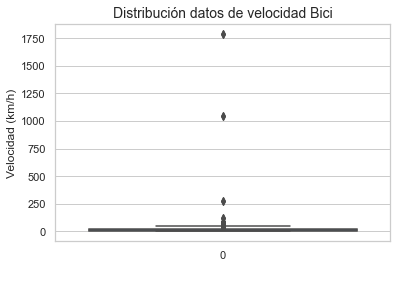

In [4]:
#Se realiza el boxplot de las velocidades en Bicicleta
boxplot = sns.boxplot(data=velbici["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad Bici", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
#plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici1.png", dpi = 300)

Text(0, 0.5, 'Velocidad (km/h)')

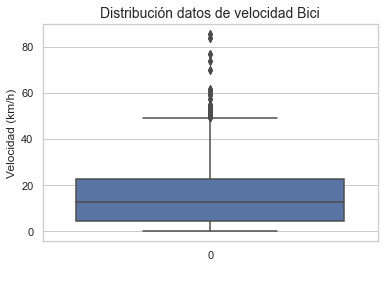

In [5]:
#Se eliminan los datos con velocidades mayores a 100 km/h
velbici = velbici[(velbici.velocity_k <= 100)]
boxplot = sns.boxplot(data=velbici["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad Bici", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
#plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici2.png", dpi = 300)

In [6]:
#La media aritmética se define como la suma de N elementos dividida entre N.
media = velbici["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana = velbici["velocity_k"].median()
#La moda es el valor más repetido (solo aplicable a variables discretas).
moda = velbici["velocity_k"].mode()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstd = velbici["velocity_k"].std(ddof=0)
var = velbici["velocity_k"].var(ddof=0)

print("Media: ", media)
print("Mediana: ", mediana)
print("Desviasión estandar: ", desvstd)
print("Variancia: ", var)
print("Moda: ", moda)

Media:  14.58232978831774
Mediana:  12.616949981557259
Desviasión estandar:  11.29333576844451
Variancia:  127.53943277882817
Moda:  0    0.0
dtype: float64


In [7]:
#Máximo
maximo = velbici["velocity_k"].max()
#Mínimo
minimo = velbici["velocity_k"].min()
#percentil 75
Q75 = velbici["velocity_k"].quantile(0.75)
#Percentil 25
Q25 = velbici["velocity_k"].quantile(0.25)
#El rango es la diferencia entre el máximo y el mínimo
rango = velbici["velocity_k"].max() - velbici["velocity_k"].min()
#el rango intercuartílico o IQR es la diferencia entre el tercer y el primer cuartil.
iqr = velbici["velocity_k"].quantile(0.75) - velbici["velocity_k"].quantile(0.25)

print("Máximo: ", maximo)
print("Mínimo: ", minimo)
print("Percentil 75: ", Q75)
print("Percentil 25: ", Q25)
print("Rango: ", rango)
print("IQR: ", iqr)

Máximo:  85.66640211177796
Mínimo:  0.0
Percentil 75:  22.551837425444432
Percentil 25:  4.550258944870737
Rango:  85.66640211177796
IQR:  18.001578480573695


Text(0.5, 1.0, 'Grafico de frecuencias de velocidad Bici')

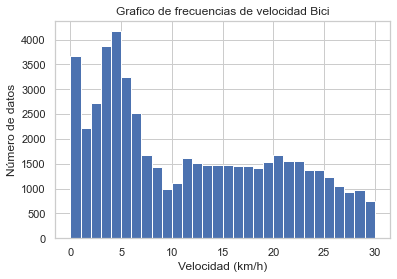

In [8]:
#Se revisan las velocidades de la ciudad menor a 30km/h para revisar cual es la velocidad menor mas representativa y cual puede ser basura
Valor_min=30
bic0 = velbici[(velbici.velocity_k <= Valor_min)]
#bins = np.arange(0, 2+0.5, 0.5)
#Se define el rango de división de los datos
rango = 1
#Se construye el grupo de datos
n_group = int(Valor_min/rango)
#Definición del histograma
hist, bin_edges = np.histogram(bic0["velocity_k"], n_group)
plt.hist(bic0["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad Bici")
#plt.show()
#plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici3.png", dpi = 300)

Text(0.5, 1.0, 'Grafico de frecuencias de velocidad Bici')

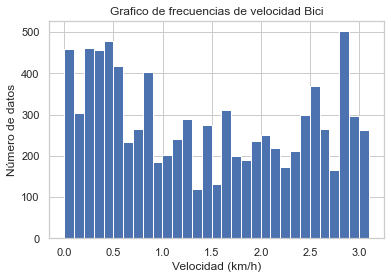

In [9]:
#Por ultimo se hace un analisis en los datos donde la tendencia es similar al de las velocidades altas
Valor_min=0
Valor_med=3.1
bic1 = velbici[(velbici.velocity_k >= Valor_min) & (velbici.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 0.1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(bic1["velocity_k"], n_group)
plt.hist(bic1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad Bici")
#plt.show()
#plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici4.png", dpi = 300)

In [10]:
#Se define rangos de velocidad de 0.5km/h como minima segun el anterior analisis
#y rango máximo de 46km/h para quedar dentro de los rangos del boxplot
cerosbici = velbici[(velbici.velocity_k >= 1) & (velbici.velocity_k <= 50)]
print(len(cerosbici))
print(len(velbici))
print(len(velbici)-len(cerosbici))

56594
60340
3746


Text(0, 0.5, 'Velocidad (km/h)')

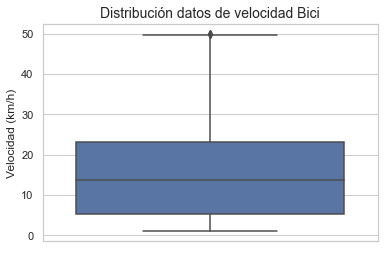

In [11]:
#Se recalcula el boxplot para determinar las velocidades fuera de rango
boxplot = sns.boxplot(y=cerosbici["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad Bici", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
#plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/Bici5.png", dpi = 300)

In [12]:
#La media aritmética se define como la suma de N elementos dividida entre N.
medianew = cerosbici["velocity_k"].mean()
mediaref = velbici["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediananew = cerosbici["velocity_k"].median()
medianaref = velbici["velocity_k"].median()
#La moda es el valor más repetido (solo aplicable a variables discretas).
modanew = cerosbici["velocity_k"].mode()
modaref = velbici["velocity_k"].mode()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstdnew = cerosbici["velocity_k"].std(ddof=0)
desvstdref = velbici["velocity_k"].std(ddof=0)
varnew = cerosbici["velocity_k"].var(ddof=0)
varref = velbici["velocity_k"].var(ddof=0)


print("Media ref: ", mediaref)
print("Media new: ", medianew)
print(" ")
print("Mediana ref: ", medianaref)
print("Mediana new: ", mediananew)
print(" ")
print("Desviasión estandar ref: ", desvstdref)
print("Desviasión estandar new: ", desvstdnew)
print(" ")
print("Variancia ref: ", varref)
print("Variancia new: ", varnew)
print(" ")
print("Moda ref: ", modaref)
print("Moda new: ", modanew)

Media ref:  14.58232978831774
Media new:  15.444090110191645
 
Mediana ref:  12.616949981557259
Mediana new:  13.819852899966971
 
Desviasión estandar ref:  11.29333576844451
Desviasión estandar new:  10.947152284901534
 
Variancia ref:  127.53943277882817
Variancia new:  119.8401431488249
 
Moda ref:  0    0.0
dtype: float64
Moda new:  0         1.000305
1         1.000875
2         1.003913
3         1.004038
4         1.005014
           ...    
28292    49.630812
28293    49.700176
28294    49.725964
28295    49.956046
28296    49.961249
Length: 28297, dtype: float64


In [13]:
#Máximo
maximoref = velbici["velocity_k"].max()
maximonew = cerosbici["velocity_k"].max()
#Mínimo
minimoref = velbici["velocity_k"].min()
minimonew = cerosbici["velocity_k"].min()
#percentil 75
Q75ref = velbici["velocity_k"].quantile(0.75)
Q75new = cerosbici["velocity_k"].quantile(0.75)
#Percentil 25
Q25ref = velbici["velocity_k"].quantile(0.25)
Q25new = cerosbici["velocity_k"].quantile(0.25)
#El rango es la diferencia entre el máximo y el mínimo
rangoref = velbici["velocity_k"].max() - velbici["velocity_k"].min()
rangonew = cerosbici["velocity_k"].max() - cerosbici["velocity_k"].min()
#el rango intercuartílico o IQR es la diferencia entre el tercer y el primer cuartil.
iqrref = velbici["velocity_k"].quantile(0.75) - velbici["velocity_k"].quantile(0.25)
iqrnew = cerosbici["velocity_k"].quantile(0.75) - cerosbici["velocity_k"].quantile(0.25)

print("Máximo ref: ", maximoref)
print("Máximo new: ", maximonew)
print(" ")
print("Mínimo ref: ", minimoref)
print("Mínimo new: ", minimonew)
print(" ")
print("Percentil 75 ref: ", Q75ref)
print("Percentil 75 new: ", Q75new)
print(" ")
print("Percentil 25 ref: ", Q25ref)
print("Percentil 25 new: ", Q25new)
print(" ")
print("Rango ref: ", rangoref)
print("Rango new: ", rangonew)
print(" ")
print("IQR ref: ", iqrref)
print("IQR new: ", iqrnew)

Máximo ref:  85.66640211177796
Máximo new:  49.96124854684754
 
Mínimo ref:  0.0
Mínimo new:  1.000305015488004
 
Percentil 75 ref:  22.551837425444432
Percentil 75 new:  23.138537825182873
 
Percentil 25 ref:  4.550258944870737
Percentil 25 new:  5.357518218957474
 
Rango ref:  85.66640211177796
Rango new:  48.96094353135954
 
IQR ref:  18.001578480573695
IQR new:  17.7810196062254


In [14]:
#Se guarda el Shape
cerosbici.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/shapes_fin/Bici2.shp")

## TPC

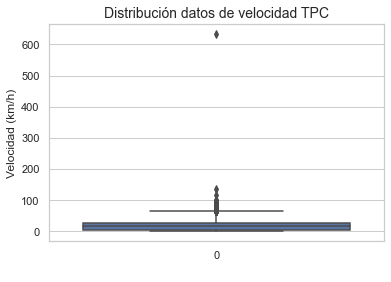

In [14]:
#Se realiza el boxplot de las velocidades en TPC
boxplot = sns.boxplot(data=velTPC["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad TPC", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/TPC1.png", dpi = 300)

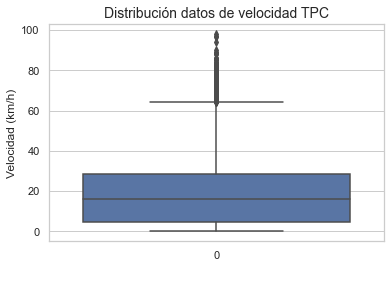

In [22]:
#Se eliminan los datos con velocidades mayores a 100 km/h
velTPC = velTPC[(velTPC.velocity_k <= 100)]
boxplot = sns.boxplot(data=velTPC["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad TPC", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/TPC2.png", dpi = 300)

In [33]:
#La media aritmética se define como la suma de N elementos dividida entre N.
media = velTPC["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediana = velTPC["velocity_k"].median()
#La moda es el valor más repetido (solo aplicable a variables discretas).
moda = velTPC["velocity_k"].mode()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstd = velTPC["velocity_k"].std(ddof=0)
var = velTPC["velocity_k"].var(ddof=0)

print("Media: ", media)
print("Mediana: ", mediana)
print("Desviasión estandar: ", desvstd)
print("Variancia: ", var)
print("Moda: ", moda)

Media:  18.37412436097829
Mediana:  16.153354689092037
Desviasión estandar:  15.227010545612808
Variancia:  231.86185015620364
Moda:  0    0.0
dtype: float64


In [34]:
#Máximo
maximo = velTPC["velocity_k"].max()
#Mínimo
minimo = velTPC["velocity_k"].min()
#percentil 75
Q75 = velTPC["velocity_k"].quantile(0.75)
#Percentil 25
Q25 = velTPC["velocity_k"].quantile(0.25)
#El rango es la diferencia entre el máximo y el mínimo
rango = velTPC["velocity_k"].max() - velTPC["velocity_k"].min()
#el rango intercuartílico o IQR es la diferencia entre el tercer y el primer cuartil.
iqr = velTPC["velocity_k"].quantile(0.75) - velTPC["velocity_k"].quantile(0.25)

print("Máximo: ", maximo)
print("Mínimo: ", minimo)
print("Percentil 75: ", Q75)
print("Percentil 25: ", Q25)
print("Rango: ", rango)
print("IQR: ", iqr)

Máximo:  98.18833396698639
Mínimo:  0.0
Percentil 75:  28.51745469577874
Percentil 25:  4.628675472710582
Rango:  98.18833396698639
IQR:  23.888779223068155


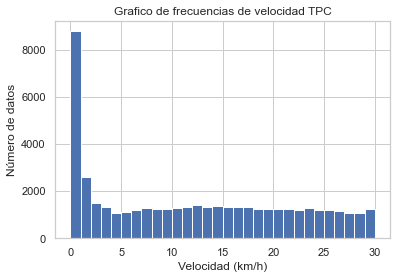

In [35]:
#Se revisan las velocidades de la ciudad menor a 30km/h para revisar cual es la velocidad menor mas representativa y cual puede ser basura
Valor_min=30
TPC0 = velTPC[(velTPC.velocity_k <= Valor_min)]
#bins = np.arange(0, 2+0.5, 0.5)
#Se define el rango de división de los datos
rango = 1
#Se construye el grupo de datos
n_group = int(Valor_min/rango)
#Definición del histograma
hist, bin_edges = np.histogram(TPC0["velocity_k"], n_group)
plt.hist(TPC0["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad TPC")
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/TPC3.png", dpi = 300)

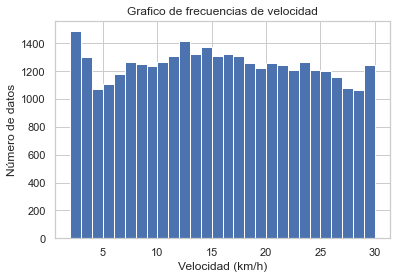

In [63]:
#Una vez visto los datosse hace un rango mas cerrado sacando los posibles datos basura
#Se define el rango minimo y mayor para ver el comportamiento de los datos
Valor_min=2
Valor_med=30
#Se sacan los valores con estas caracteristicas
TPC1 = velTPC[(velTPC.velocity_k >= Valor_min) & (velTPC.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(TPC1["velocity_k"], n_group)
plt.hist(TPC1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad")
plt.show()

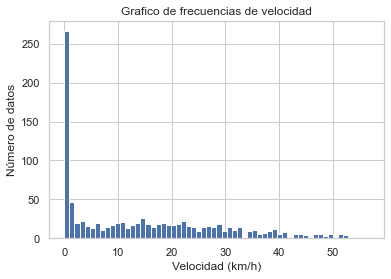

In [64]:
#Para comparar la velocidad de la ciudad se determina una zona caracteristica como el centro en la que se puedan tener velocidades bajas
#Se determinan las coordenadas CX1 y CY1 en la esquina superior izquierda de la zona rectangular
#Se determinan las coordenadas CX2 y CY2 en la esquina inferior derecha de la zona rectangular
CX1 = 870237.698
CY1 = 983702.597
CX2 = 870777.45
CY2 = 983131.096
#punto=velcarro.loc[1,'geometry']
#p=punto.x 
#Se extraen los datos que cumplan con esta condición entrando en la zona de analisis
velocidadcentro = velTPC[((velTPC.geometry.x >= CX1) & (velTPC.geometry.y <= CY1)) & ((velTPC.geometry.x <= CX2) & (velTPC.geometry.y >= CY2))]
#Se define un valor maximo de velocidad para ver el comportamiento en el histograma
Valor_min=60
TPCc = velocidadcentro[(velocidadcentro.velocity_k <= Valor_min)]
#bins = np.arange(0, 2+0.5, 0.5)
#Al igual que un rango de los datos para verlos
rango = 1
n_group = int(Valor_min/rango)
hist, bin_edges = np.histogram(TPCc["velocity_k"], n_group)
plt.hist(TPCc["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad")
plt.show()

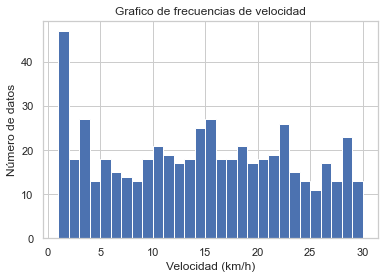

In [65]:
#Despues de ver el comportamiento se define un valor menor haciendo un zoom a los datos del analisis
Valor_min=1
Valor_med=30
TPCc1 = velocidadcentro[(velocidadcentro.velocity_k >= Valor_min) & (velocidadcentro.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(TPCc1["velocity_k"], n_group)
plt.hist(TPCc1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad")
plt.show()

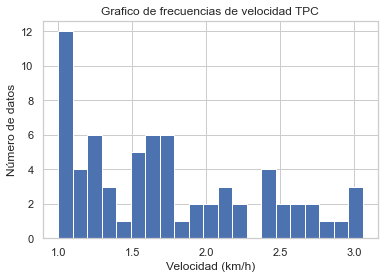

In [75]:
#Por ultimo se hace un analisis en los datos donde la tendencia es similar al de las velocidades altas
Valor_min=1
Valor_med=3.1
TPCc1 = velocidadcentro[(velocidadcentro.velocity_k >= Valor_min) & (velocidadcentro.velocity_k <= Valor_med)]
#bins = np.arange(0, 2+0.5, 0.5)
rango = 0.1
n_group = int((Valor_med-Valor_min)/rango)
hist, bin_edges = np.histogram(TPCc1["velocity_k"], n_group)
plt.hist(TPCc1["velocity_k"], bins=bin_edges)
plt.xlabel("Velocidad (km/h)")
plt.ylabel("Número de datos")
plt.title("Grafico de frecuencias de velocidad TPC")
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/TPC4.png", dpi = 300)

In [67]:
#Se define rangos de velocidad de 2km/h como minima segun el anterior analisis
#y rango máximo de 79km/h para quedar dentro de los rangos del boxplot
cerosTPC = velTPC[(velTPC.velocity_k >= 1.5) & (velTPC.velocity_k <= 80)]
print(len(cerosTPC))
print(len(velTPC))
print(len(velTPC)-len(cerosTPC))

49284
59615
10331


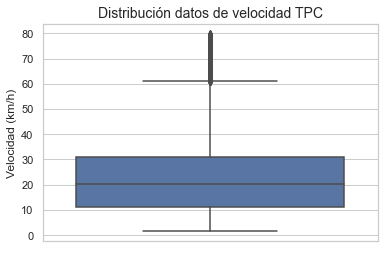

In [76]:
#Se recalcula el boxplot para determinar las velocidades fuera de rango
boxplot = sns.boxplot(y=cerosTPC["velocity_k"])
boxplot.axes.set_title("Distribución datos de velocidad TPC", fontsize=14)
boxplot.set_xlabel(" ", fontsize=12)
boxplot.set_ylabel("Velocidad (km/h)", fontsize=12)
#plt.show()
plt.savefig("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/Articulo/Graficas/boxplot/TPC5.png", dpi = 300)

In [69]:
#La media aritmética se define como la suma de N elementos dividida entre N.
medianew = cerosTPC["velocity_k"].mean()
mediaref = velTPC["velocity_k"].mean()
#La mediana es el valor que dentro del conjunto de datos es menor que el 50% de los datos y mayor que el 50% restante.
mediananew = cerosTPC["velocity_k"].median()
medianaref = velTPC["velocity_k"].median()
#La moda es el valor más repetido (solo aplicable a variables discretas).
modanew = cerosTPC["velocity_k"].mode()
modaref = velTPC["velocity_k"].mode()
#La desviación típica mide la dispersión de los datos respecto a la media
desvstdnew = cerosTPC["velocity_k"].std(ddof=0)
desvstdref = velTPC["velocity_k"].std(ddof=0)
varnew = cerosTPC["velocity_k"].var(ddof=0)
varref = velTPC["velocity_k"].var(ddof=0)


print("Media ref: ", mediaref)
print("Media new: ", medianew)
print(" ")
print("Mediana ref: ", medianaref)
print("Mediana new: ", mediananew)
print(" ")
print("Desviasión estandar ref: ", desvstdref)
print("Desviasión estandar new: ", desvstdnew)
print(" ")
print("Variancia ref: ", varref)
print("Variancia new: ", varnew)
print(" ")
print("Moda ref: ", modaref)
print("Moda new: ", modanew)

Media ref:  18.37412436097829
Media new:  22.09227685181312
 
Mediana ref:  16.153354689092037
Mediana new:  20.210503295762308
 
Desviasión estandar ref:  15.227010545612808
Desviasión estandar new:  14.021673097918724
 
Variancia ref:  231.86185015620364
Variancia new:  196.60731646489768
 
Moda ref:  0    0.0
dtype: float64
Moda new:  0    8.0
dtype: float64


In [70]:
#Máximo
maximoref = velTPC["velocity_k"].max()
maximonew = cerosTPC["velocity_k"].max()
#Mínimo
minimoref = velTPC["velocity_k"].min()
minimonew = cerosTPC["velocity_k"].min()
#percentil 75
Q75ref = velTPC["velocity_k"].quantile(0.75)
Q75new = cerosTPC["velocity_k"].quantile(0.75)
#Percentil 25
Q25ref = velTPC["velocity_k"].quantile(0.25)
Q25new = cerosTPC["velocity_k"].quantile(0.25)
#El rango es la diferencia entre el máximo y el mínimo
rangoref = velTPC["velocity_k"].max() - velbici["velocity_k"].min()
rangonew = cerosTPC["velocity_k"].max() - cerosbici["velocity_k"].min()
#el rango intercuartílico o IQR es la diferencia entre el tercer y el primer cuartil.
iqrref = velTPC["velocity_k"].quantile(0.75) - velbici["velocity_k"].quantile(0.25)
iqrnew = cerosTPC["velocity_k"].quantile(0.75) - cerosbici["velocity_k"].quantile(0.25)

print("Máximo ref: ", maximoref)
print("Máximo new: ", maximonew)
print(" ")
print("Mínimo ref: ", minimoref)
print("Mínimo new: ", minimonew)
print(" ")
print("Percentil 75 ref: ", Q75ref)
print("Percentil 75 new: ", Q75new)
print(" ")
print("Percentil 25 ref: ", Q25ref)
print("Percentil 25 new: ", Q25new)
print(" ")
print("Rango ref: ", rangoref)
print("Rango new: ", rangonew)
print(" ")
print("IQR ref: ", iqrref)
print("IQR new: ", iqrnew)

Máximo ref:  98.18833396698639
Máximo new:  79.824672251329
 
Mínimo ref:  0.0
Mínimo new:  1.5
 
Percentil 75 ref:  28.51745469577874
Percentil 75 new:  31.0
 
Percentil 25 ref:  4.628675472710582
Percentil 25 new:  11.0
 
Rango ref:  98.18833396698639
Rango new:  78.824367235841
 
IQR ref:  24.04993286312363
IQR new:  24.194577259549504


In [74]:
#Se guarda el Shape
cerosTPC.to_file("G:/Mi unidad/Docencia/Maestria UNAL/Trabajo de grado/Tesis 2.0/Tesis/VelocidadesPMMEP/shapes_fin/TPC.shp")

Continua en el codigo categorizacion_tiempo.ipynb donde se distinguiran las velocidades segun el horario pico o valle